# Predictive Modeling


## Merging, cleaning datasets

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold
from sklearn import metrics
%matplotlib inline

In [2]:
#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')

In [3]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin
# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]

In [4]:
#merging splash with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])

In [5]:
#avg of posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])

In [6]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_splash2.head(n = 3)
#fill na for new meta splash data
meta_splash2 = meta_splash2.fillna(0)

In [7]:

import numpy
import matplotlib.pyplot as plot
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data preprocessing for modeling

In [8]:
# Finding Correlated Features
meta_splash2_corr = meta_splash2.corr()['SPOSTMIN'][:-2]
golden_features_list_2 = meta_splash2_corr[abs(meta_splash2_corr) > 0.20].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list_2), golden_features_list_2))

There is 42 strongly correlated values with SPOSTMIN:
SPOSTMIN              1.000000
AKHOURSYEST           0.532307
AKHOURS               0.531074
AKHOURSEMH            0.530836
AKHOURSTOM            0.526427
AKHOURSEMHYEST        0.520594
AKHOURSEMHTOM         0.506027
MKHOURS               0.419589
MKHOURSEMH            0.403368
HSHOURS               0.375347
HSHOURSTOM            0.364362
HSHOURSYEST           0.356237
WDWMAXTEMP            0.334935
EP09CAPACITY          0.323179
HSFIREWK              0.301307
YEAR                  0.297048
WDWMEANTEMP           0.284476
HSHOURSEMHYEST        0.278263
WEATHER_WDWPRECIP     0.271109
HSHOURSEMHTOM         0.270584
HSHOURSEMH            0.270417
AKEMHETOM             0.266406
AKEMHEVE              0.262796
AKEMHEYEST            0.260835
CapacityLost_HS       0.253429
CapacityLostWGT_HS    0.250829
WEATHER_WDWHIGH       0.250729
WDWMINTEMP            0.228848
CapacityLost_EP       0.219181
MKHOURSTOM            0.215867
HS20CAPACITY    

In [9]:
golden_list_2 = golden_features_list_2.to_frame()
golden_list_2 = golden_list_2.reset_index()
golden_list_2 # = pd.DataFrame(golden_list,columns=['VARIABLES','SPOSTMIN'])
golden_list_2 = golden_list_2.iloc[:,0]
golden_list_2 = golden_list_2.tolist()
golden_list_2.remove('SPOSTMIN')

golden_list_2

['AKHOURSYEST',
 'AKHOURS',
 'AKHOURSEMH',
 'AKHOURSTOM',
 'AKHOURSEMHYEST',
 'AKHOURSEMHTOM',
 'MKHOURS',
 'MKHOURSEMH',
 'HSHOURS',
 'HSHOURSTOM',
 'HSHOURSYEST',
 'WDWMAXTEMP',
 'EP09CAPACITY',
 'HSFIREWK',
 'YEAR',
 'WDWMEANTEMP',
 'HSHOURSEMHYEST',
 'WEATHER_WDWPRECIP',
 'HSHOURSEMHTOM',
 'HSHOURSEMH',
 'AKEMHETOM',
 'AKEMHEVE',
 'AKEMHEYEST',
 'CapacityLost_HS',
 'CapacityLostWGT_HS',
 'WEATHER_WDWHIGH',
 'WDWMINTEMP',
 'CapacityLost_EP',
 'MKHOURSTOM',
 'HS20CAPACITY',
 'CapacityLostWGT_EP',
 'WDWMINTEMP_mean',
 'CapacityLostWGT_MK',
 'MKHOURSYEST',
 'CapacityLost_MK',
 'DAYOFYEAR',
 'WEEKOFYEAR',
 'MONTHOFYEAR',
 'MKevent',
 'MKEVENTSTREAK',
 'MKEVENTSTREAK_F']

We will use these 42 highly correlated features for modeling.

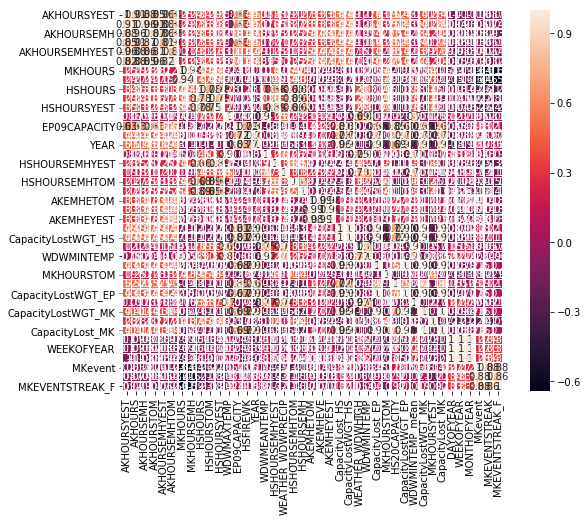

In [10]:
# Correlation matrix
corrdf = meta_splash2[golden_list_2].corr()

f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrdf, square=True, linewidths=.5, annot=True)

In [11]:
# Splitting Dataset between dependent & independent variables
x = meta_splash2[golden_list_2]
y = meta_splash2['SPOSTMIN']

#75% training & 25% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

y_train = np.log(y_train)
y_test = np.log(y_test)

In [12]:
print('Number of observations:', x.shape[0])
print('Number of predictors:', x.shape[1])


Number of observations: 2381
Number of predictors: 41


## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train, y_train)
# Make Prediction on test set
y_predlm= lm.predict(x_test)


In [14]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predlm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predlm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predlm)))

# Caculating Error
errors = round(metrics.mean_absolute_error(y_test, y_predlm),2)
#mean Absolute Percentage Error
mape = 100 * (errors / y_test)
acc_linear = (100 - np.mean(mape)).round(2,)
print('Accuracy:', round(acc_linear, 2), '%')


Mean Absolute Error: 0.535498956313821
Mean Squared Error: 37.81755511959217
Root Mean Squared Error: 6.14959796406173
Accuracy: 84.03 %


## Ridge Regression


In [15]:
from sklearn.linear_model import Ridge

In [16]:
## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
y_pred_ridge = ridgeReg.predict(x_test)

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ridge))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ridge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))


# Caculating Error
errors = round(metrics.mean_absolute_error(y_test, y_pred_ridge),2)
#mean Absolute Percentage Error
mape = 100 * (errors / y_test)
acc_ridge = (100 - np.mean(mape)).round(2,)
print('Accuracy:', round(acc_ridge, 2), '%')


Mean Absolute Error: 0.29002764826228244
Mean Squared Error: 0.16253927764991233
Root Mean Squared Error: 0.4031616024002191
Accuracy: 91.43 %


## Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

In [19]:
# Training Lasso Model
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(x_train,y_train)
y_pred_lasso = lassoReg.predict(x_test)

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

errors = round(metrics.mean_absolute_error(y_test, y_pred_lasso),2)
#Mean Absolute Percentage Error
mape = 100 * (errors / y_test)
acc_lasso = (100 - np.mean(mape)).round(2,)
print('Accuracy:', round(acc_lasso, 2), '%.')



Mean Absolute Error: 0.4871200046883192
Mean Squared Error: 0.383893173247407
Root Mean Squared Error: 0.6195911339322142
Accuracy: 85.51 %.


## Elastic Net Regression

In [21]:
from sklearn.linear_model import ElasticNet

In [22]:
# Training Elastic Net Regression Model
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)
y_pred_en = ENreg.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_en))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_en))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_en)))

errors = round(metrics.mean_absolute_error(y_test, y_pred_en),2)
#Mean Absolute Percentage Error
mape = 100 * (errors / y_test)
acc_en = (100 - np.mean(mape)).round(2,)
print('Accuracy:', round(acc_en, 2), '%.')

Mean Absolute Error: 0.3809037750258196
Mean Squared Error: 0.2571850919825086
Root Mean Squared Error: 0.5071341952407751
Accuracy: 88.76 %.


Out of all three OLS techniques, Linear Regression was the best in terms of accuracy.

# Let's see if an ensemble method would work better!

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

#Create a Gaussian Classifier
rf = RandomForestRegressor(n_estimators = 100)
#train the model using the traing set
dt = rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [25]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

errors = round(metrics.mean_absolute_error(y_test, y_pred_rf),2)
#Mean Absolute Percentage Error
mape = 100 * (errors / y_test)
acc_rf = (100 - np.mean(mape)).round(2,)
print('Accuracy:', round(acc_rf, 2), '%.')

Mean Absolute Error: 0.22858547800112605
Mean Squared Error: 0.10932306172535038
Root Mean Squared Error: 0.33064038126845663
Accuracy: 93.2 %.


Wow! Our random forest model does significantly better than any of our OLS modeling methods.

# Predicting Summer Months


In [26]:
# Subsetting only summer months

summer_df = meta_splash2[(meta_splash2.MONTHOFYEAR == 5) | (meta_splash2.MONTHOFYEAR == 6)|
                        (meta_splash2.MONTHOFYEAR == 7)|(meta_splash2.MONTHOFYEAR == 8)|
                        (meta_splash2.MONTHOFYEAR == 9)]
summer2018_df = summer_df[summer_df.YEAR == 2018]
summer2018_df
actual_time = summer2018_df.iloc[:,0:2]
actual_time.index = range(153)
summer2018_dates = summer2018_df.iloc[:,0:1]

In [27]:
#Test rf on summer 2018
predict_time_df = summer2018_df[golden_list_2]
predict_time_df

#Create a Gaussian Classifier
rf = RandomForestRegressor(n_estimators = 100)

#train the model using the traing set
rf.fit(x_train,y_train)

predicted_time = rf.predict(predict_time_df)

In [28]:
# Dataframe with actual wait time vs predicted time
predicted_time_df = pd.DataFrame(predicted_time)
predicted_time_df.head(n = 6)

comparison_df = pd.concat([actual_time,predicted_time_df],
                              axis = 1)
comparison_df = comparison_df.rename({'date':'Date',
                                     'SPOSTMIN':'Actual_Time',
                                     0:'Predicted_Time'}, axis = 1)
comparison_df.head(n = 10)

,Date,Actual_Time,Predicted_Time
0,2018-05-01,37.875000,3.699070
1,2018-05-02,45.781250,3.865478
2,2018-05-03,38.911290,3.739185
3,2018-05-04,60.344828,4.006212
4,2018-05-05,38.885135,3.956052
5,2018-05-06,30.538462,3.533792
6,2018-05-07,72.830189,4.153528
7,2018-05-08,52.552083,3.873578
8,2018-05-09,18.000000,3.320256
9,2018-05-10,41.666667,3.761150


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


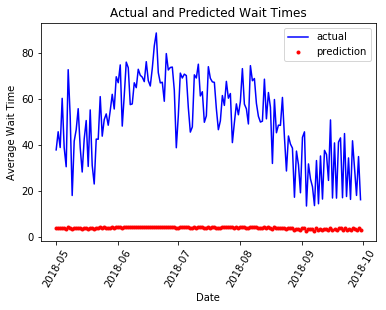

In [29]:
#ax = sns.lineplot(comparison_df.Date,comparison_df.Actual_Time)
#ax = sns.scatterplot(comparison_df.Date,comparison_df.Predicted_Time,palette)

plt.plot(comparison_df.Date, comparison_df.Actual_Time,'b-', label = 'actual')

plt.plot(comparison_df.Date, comparison_df.Predicted_Time,'ro', label = 'prediction',
        markersize = 3)

plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Average Wait Time'); plt.title('Actual and Predicted Wait Times');


In [30]:
# Creating new dataframe with accuracy and MSE

mse = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "Elastic", "Random Forest"],
    "Accuracy": [acc_linear, acc_ridge, acc_lasso, acc_en, acc_rf],
    "MSE": [metrics.mean_squared_error(y_test, y_predlm), metrics.mean_squared_error(y_test, y_pred_ridge), metrics.mean_squared_error(y_test, y_pred_lasso), metrics.mean_squared_error(y_test, y_pred_en), metrics.mean_squared_error(y_test, y_pred_rf)]})

mse

,Model,Accuracy,MSE
0,Linear,84.03,37.817555
1,Ridge,91.43,0.162539
2,Lasso,85.51,0.383893
3,Elastic,88.76,0.257185
4,Random Forest,93.20,0.109323
